# 1. Local features
- Extract & calculate local features
- Match features between two images

In [1]:
import cv2
import numpy as np

## Load images
imgs = [cv2.imread('data/image{}.png'.format(i+1)) for i in range(4)]


[ WARN:0@0.043] global loadsave.cpp:241 findDecoder imread_('data/image3.png'): can't open/read file: check file path/integrity
[ WARN:0@0.043] global loadsave.cpp:241 findDecoder imread_('data/image4.png'): can't open/read file: check file path/integrity


In [2]:
import numpy as np
import cv2
from helper import featMatch
from helper import computeBrief
from helper import corner_detection

def matchPics(I1, I2):
    """
    Match images

    I1, I2: Images to match
    """

    # Convert Images to GrayScale
    I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
    I2_gray = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)

    # Detect Features in Both Images
    loc1 = corner_detection(I1_gray)
    loc2 = corner_detection(I2_gray)

    # Obtain descriptors for the computed feature locations
    desc1, locs1 = computeBrief(I1_gray, loc1)
    desc2, locs2 = computeBrief(I2_gray, loc2)

    #Match features using the descriptors
    matches = featMatch(desc1, desc2)

    return matches, locs1, locs2


def matchPicsORB(I1, I2):
    """
    Match images

    I1, I2: Images to match
    """

    # Convert Images to GrayScale
    I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
    I2_gray = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)

    # Detect Features in Both Images
    loc1 = corner_detection(I1_gray)
    loc2 = corner_detection(I2_gray)

    # Obtain descriptors for the computed feature locations
    desc1, locs1 = computeBrief(I1_gray, loc1)
    desc2, locs2 = computeBrief(I2_gray, loc2)

    #Match features using the descriptors
    matches = featMatch(desc1, desc2)

    return matches, locs1, locs2

In [33]:
from helper import plotMatches

img1 = cv2.imread('data/image1.png')
img2 = cv2.imread('data/image2.png')

matches, locs1, locs2 = matchPics(img1, img2)


/home/chkim/HYU-2024-AUE8089/helper.py:19: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  skimage.feature.plot_matches(ax,im1,im2,locs1,locs2,matches,matches_color=color,only_matches=True)


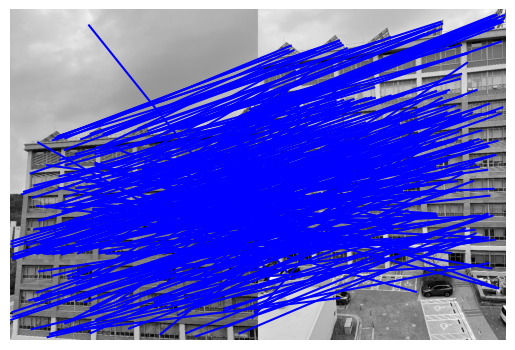

In [36]:
plotMatches(img1, img2, matches, locs1, locs2, color='b')

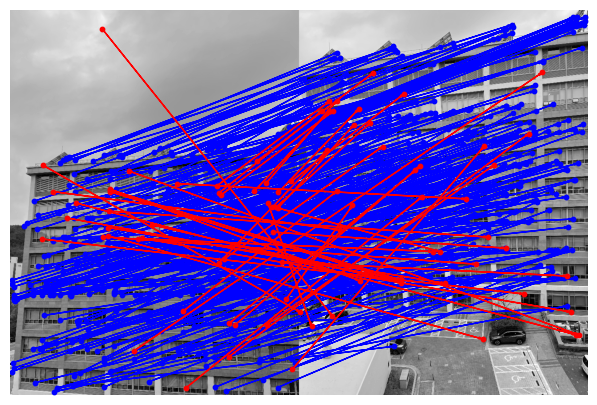

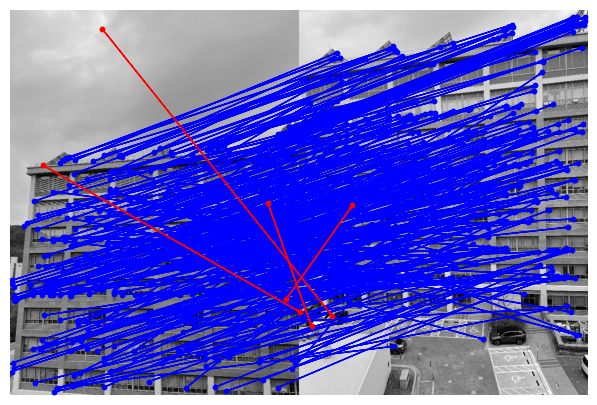

In [54]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

def my_matching_plot(matches, locs1, locs2, img1, img2, threshold = 0.95):
    locs1, locs2 = np.array(locs1), np.array(locs2)
    p1_coords, p2_coords = locs1[matches[:, 0]], locs2[matches[:, 1]]  

    im1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    im2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    combined_image = np.hstack((im1, im2))
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(combined_image, cmap='gray')

    displacement_vectors = p2_coords - p1_coords  
    displacement_vectors[:, 1] += im1.shape[1]  # 두 번째 이미지의 x 좌표 보정

    mean_vector = np.mean(displacement_vectors, axis=0)

    cos_similarities = np.array([
        np.dot(vec, mean_vector) / (np.linalg.norm(vec) * np.linalg.norm(mean_vector) + 1e-8)
        for vec in displacement_vectors
    ])

    is_outlier = cos_similarities < threshold

    for p1, p2, vec, outlier in zip(p1_coords, p2_coords, displacement_vectors, is_outlier):
        if not outlier:
            color = 'b'   # 이상점은 빨간색, 정상 점은 파란색
            ax.scatter([p1[1], p2[1] + im1.shape[1]], [p1[0], p2[0]], color=color, s=10)
            ax.arrow(
                p1[1], p1[0],                
                vec[1], vec[0],              
                color=color,                
                head_width=5, head_length=10, linewidth=1, length_includes_head=True
            )

    for p1, p2, vec, outlier in zip(p1_coords, p2_coords, displacement_vectors, is_outlier):
        if outlier:
            color = 'r'   # 이상점은 빨간색, 정상 점은 파란색
            ax.scatter([p1[1], p2[1] + im1.shape[1]], [p1[0], p2[0]], color=color, s=10)
            ax.arrow(
                p1[1], p1[0],                
                vec[1], vec[0],             
                color=color,                 
                head_width=5, head_length=10, linewidth=1, length_includes_head=True
            )
    plt.axis('off')
    plt.show()
my_matching_plot(matches, locs1, locs2, img1, img2)
my_matching_plot(matches, locs1, locs2, img1, img2, .8)

### BRIEF and Rotations

  0%|          | 0/72 [00:00<?, ?it/s]

Text(0.5, 1.0, 'BRIEF and Rotations')

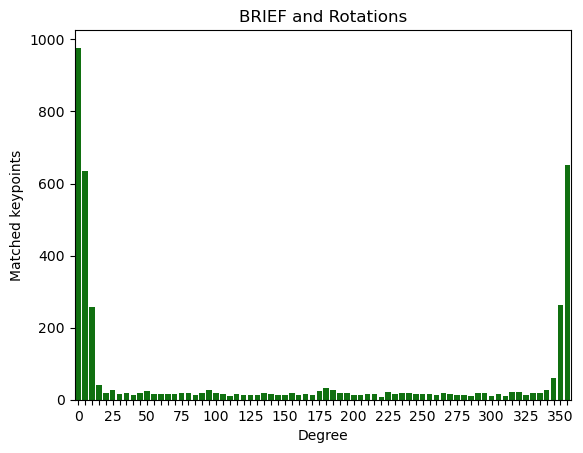

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.auto import trange

cv_cover = Image.open('data/cv_cover.jpg')
match_hist = np.zeros(36*2)

for i in trange(36*2):
    # Rotate Image
    cv_rotated = cv_cover.rotate(5 * i, expand=True)

    # Compute features, descriptors and Match features
    matches, locs1, locs2 = matchPics(np.asarray(cv_cover), np.asarray(cv_rotated))

    # Update histogram
    match_hist[i] = len(matches)


#Display histogram
angles = np.arange(0, 360, 5)
ax = sns.barplot(x=angles, y=match_hist, color='g')
_ = plt.xticks(ticks=range(len(match_hist)), labels=[v if i % 5 == 0 else '' for i, v in enumerate(angles)])
plt.xlabel('Degree')
plt.ylabel('Matched keypoints')
plt.title('BRIEF and Rotations')

In [75]:
cv_cover = Image.open('data/cv_cover.jpg')
I1_gray = cv2.cvtColor(np.asarray(cv_cover), cv2.COLOR_BGR2GRAY)

loc1 = corner_detection(I1_gray)
desc1, locs1 = computeBrief(I1_gray, loc1)

print(len(desc1))

977


  0%|          | 0/36 [00:00<?, ?it/s]

[977. 256.  20.  15.  14.  25.  15.  17.  19.  19.  18.  11.  13.  13.
  15.  13.  14.  14.  32.  19.  14.  16.   7.  17.  19.  16.  13.  16.
  13.  18.   9.   9.  21.  18.  26. 264.]


Text(0.5, 1.0, 'BRIEF and Rotations')

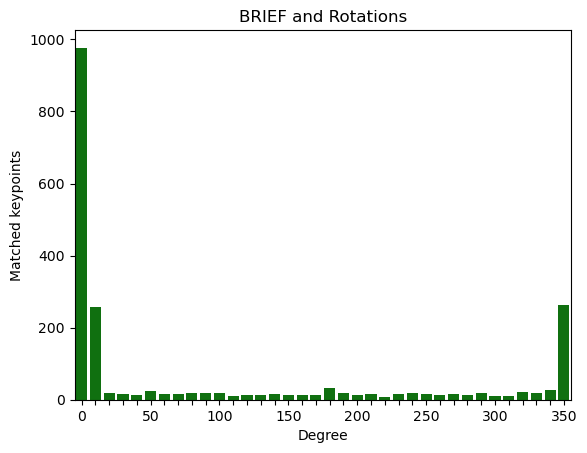

In [68]:
match_hist = np.zeros(36)

for i in trange(36):
    # Rotate Image
    cv_rotated = cv_cover.rotate(10 * i, expand=True)

    # Compute features, descriptors and Match features
    matches, locs1, locs2 = matchPics(np.asarray(cv_cover), np.asarray(cv_rotated))

    # Update histogram
    match_hist[i] = len(matches)

print(match_hist)
#Display histogram
angles = np.arange(0, 360, 10)
ax = sns.barplot(x=angles, y=match_hist, color='g')
_ = plt.xticks(ticks=range(len(match_hist)), labels=[v if i % 5 == 0 else '' for i, v in enumerate(angles)])
plt.xlabel('Degree')
plt.ylabel('Matched keypoints')
plt.title('BRIEF and Rotations')

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.auto import trange

cv_cover = Image.open('data/cv_cover.jpg')
match_hist = np.zeros(36*2)

for i in trange(36*2):
    # Rotate Image
    cv_rotated = cv_cover.rotate(5 * i, expand=True)

    # Compute features, descriptors and Match features
    matches, locs1, locs2 = matchPics(np.asarray(cv_cover), np.asarray(cv_rotated))

    # Update histogram
    match_hist[i] = len(matches)

#Display histogram
angles = np.arange(0, 360, 5)
ax = sns.barplot(x=angles, y=match_hist, color='g')
_ = plt.xticks(ticks=range(len(match_hist)), labels=[v if i % 5 == 0 else '' for i, v in enumerate(angles)])
plt.xlabel('Degree')
plt.ylabel('Matched keypoints')
plt.title('BRIEF and Rotations')

  0%|          | 0/72 [00:00<?, ?it/s]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/chkim/.conda/envs/aue8089pa1/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2560141/2173675078.py", line 14, in <module>
    matches, locs1, locs2 = matchPics(np.asarray(cv_cover), np.asarray(cv_rotated))
  File "/tmp/ipykernel_2560141/621063500.py", line 23, in matchPics
    desc1, locs1 = computeBrief(I1_gray, loc1)
  File "/home/chkim/HYU-2024-AUE8089/helper.py", line 52, in computeBrief
  File "/home/chkim/HYU-2024-AUE8089/helper.py", line 52, in <listcomp>
  File "/home/chkim/HYU-2024-AUE8089/helper.py", line 52, in <lambda>
  File "/home/chkim/HYU-2024-AUE8089/helper.py", line 40, in computePixel
    col2 = idx2 % width - halfWidth
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/chkim/.conda/envs/aue8089pa1/lib/python3.9/site-pack

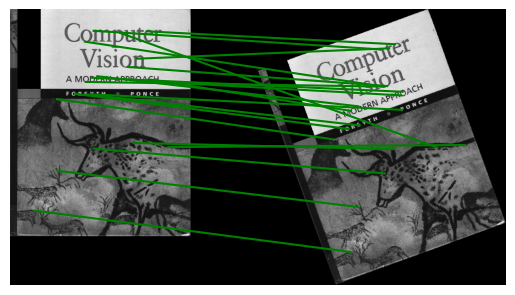

20


In [81]:
# An example: Rotate 20 degree (counter clockwise)
cv_rotated = cv_cover.rotate(20, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPics(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='g')
print(len(matches))

In [88]:
# An example: Rotate 100 degree (counter clockwise)
cv_rotated = cv_cover.rotate(100, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPics(I1, I2)

# plotMatches(I1, I2, matches, locs1, locs2, color='g')
my_matching_plot(matches, locs1, locs2, I1, I2)
print(len(matches))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 440 and the array at index 1 has size 422

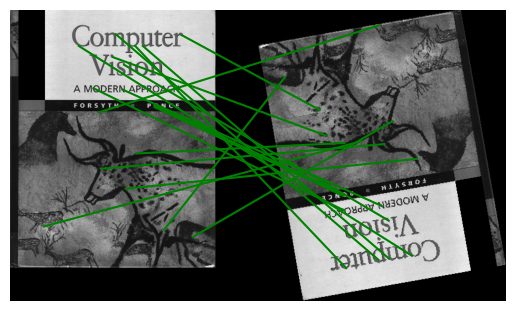

19


In [78]:
# An example: Rotate 190 degree (counter clockwise)
cv_rotated = cv_cover.rotate(190, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPics(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='g')
print(len(matches))

/home/chkim/HYU-2024-AUE8089/helper.py:19: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)


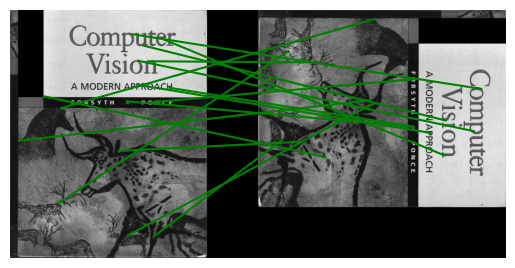

16


In [77]:
# An example: Rotate 270 degree (counter clockwise)
cv_rotated = cv_cover.rotate(270, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPics(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='g')
print(len(matches))

### A simple remedy: use ORB feature

In [9]:
import numpy as np
import cv2
from helper import featMatch
from helper import computeORB

def matchPicsORB(I1, I2):
    """
    Match images with ORB

    I1, I2: Images to match
    """

    # Convert Images to GrayScale
    I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
    I2_gray = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)

    # Obtain descriptors for the computed feature locations
    desc1, locs1 = computeORB(I1_gray)
    desc2, locs2 = computeORB(I2_gray)

    #Match features using the descriptors
    matches = featMatch(desc1, desc2, None)

    return matches, locs1, locs2


  0%|          | 0/36 [00:00<?, ?it/s]

[500. 254. 243. 235. 235. 241. 220. 243. 255. 500. 250. 240. 233. 227.
 245. 221. 248. 256. 500. 252. 239. 233. 227. 243. 221. 252. 257. 500.
 253. 241. 235. 229. 242. 220. 248. 257.]


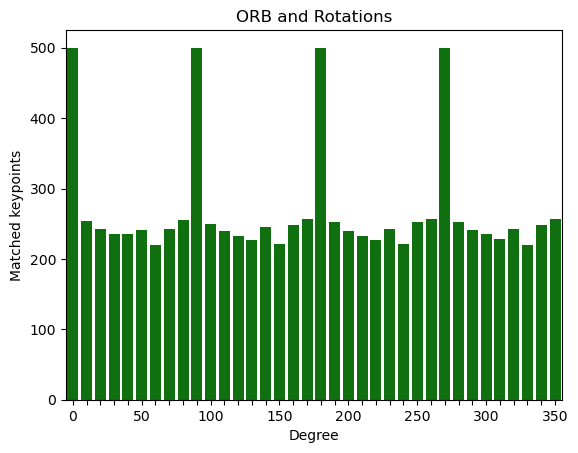

In [85]:
cv_cover = Image.open('data/cv_cover.jpg')
match_hist = np.zeros(36)

for i in trange(36):
    # [TODO] Rotate Image
    cv_rotated = cv_cover.rotate(10 * i, expand=True)

    # [TODO] Compute features, descriptors and Match features
    matches, locs1, locs2 = matchPicsORB(np.asarray(cv_cover), np.asarray(cv_rotated))

    # [TODO] Update histogram
    match_hist[i] = len(matches)


# Display histogram
angles = np.arange(0, 360, 10)
ax = sns.barplot(x=angles, y=match_hist, color='g')
_ = plt.xticks(ticks=range(len(match_hist)), labels=[v if i % 5 == 0 else '' for i, v in enumerate(angles)])
plt.xlabel('Degree')
plt.ylabel('Matched keypoints')
plt.title('ORB and Rotations')
print(match_hist)

  0%|          | 0/72 [00:00<?, ?it/s]

Text(0.5, 1.0, 'ORB and Rotations')

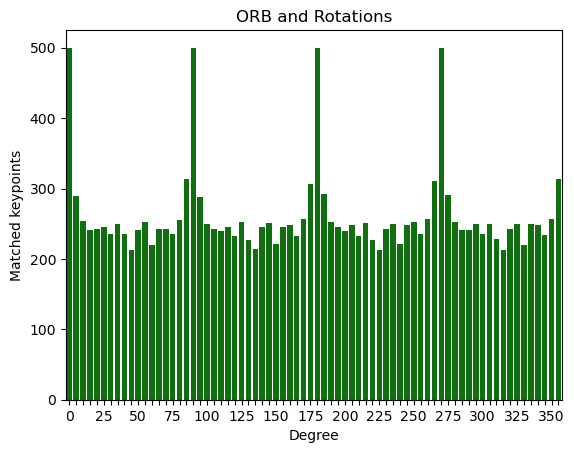

In [69]:
cv_cover = Image.open('data/cv_cover.jpg')
match_hist = np.zeros(72)

for i in trange(72):
    # [TODO] Rotate Image
    cv_rotated = cv_cover.rotate(5 * i, expand=True)

    # [TODO] Compute features, descriptors and Match features
    matches, locs1, locs2 = matchPicsORB(np.asarray(cv_cover), np.asarray(cv_rotated))

    # [TODO] Update histogram
    match_hist[i] = len(matches)


# Display histogram
angles = np.arange(0, 360, 5)
ax = sns.barplot(x=angles, y=match_hist, color='g')
_ = plt.xticks(ticks=range(len(match_hist)), labels=[v if i % 5 == 0 else '' for i, v in enumerate(angles)])
plt.xlabel('Degree')
plt.ylabel('Matched keypoints')
plt.title('ORB and Rotations')

In [94]:
# An example: Rotate 20 degree (counter clockwise)
cv_rotated = cv_cover.rotate(20, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPicsORB(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='b')
print(len(matches))

AttributeError: 'numpy.ndarray' object has no attribute 'rotate'

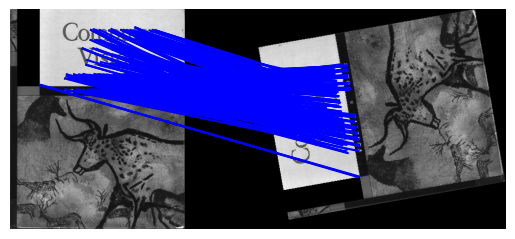

250


In [90]:
# An example: Rotate 100 degree (counter clockwise)
cv_rotated = cv_cover.rotate(100, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPicsORB(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='b')
print(len(matches))

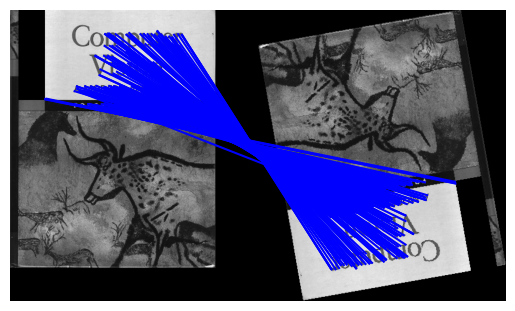

252


In [108]:
# An example: Rotate 190 degree (counter clockwise)
cv_rotated = cv_cover.rotate(190, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPicsORB(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='b')
print(len(matches))

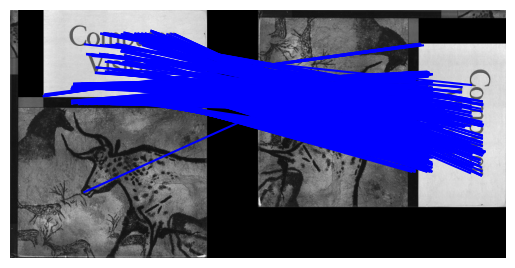

500


In [107]:
# An example: Rotate 270 degree (counter clockwise)
cv_rotated = cv_cover.rotate(270, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPicsORB(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='b')
print(len(matches))

/home/chkim/HYU-2024-AUE8089/helper.py:19: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)


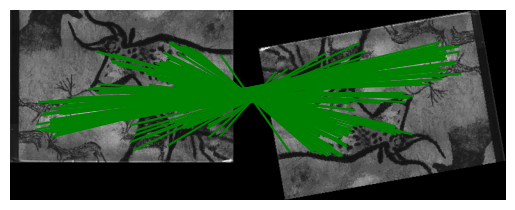

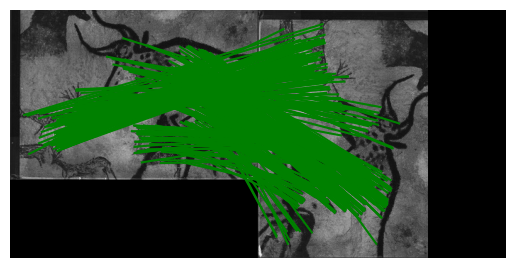

224
497


In [104]:
cv_cover = Image.open('data/cv_cover.jpg')
width, height = cv_cover.size
cv_cover_cropped = cv_cover.crop((0, 200, width, height))
cv_cover_cropped_rotated1 = cv_cover_cropped.rotate(190, expand=True)
cv_cover_cropped_rotated2 = cv_cover_cropped.rotate(270, expand=True)

I1 = np.asarray(cv_cover_cropped)
I2 = np.asarray(cv_cover_cropped_rotated1)
I3 = np.asarray(cv_cover_cropped_rotated2)

#Compute features, descriptors and Match features
matches1, locs1, locs2 = matchPicsORB(I1, I2)
matches2, locs3, locs4 = matchPicsORB(I1, I3)

plotMatches(I1, I2, matches1, locs1, locs2, color='g')
plotMatches(I1, I3, matches2, locs3, locs4, color='g')
print(len(matches1))
print(len(matches2))

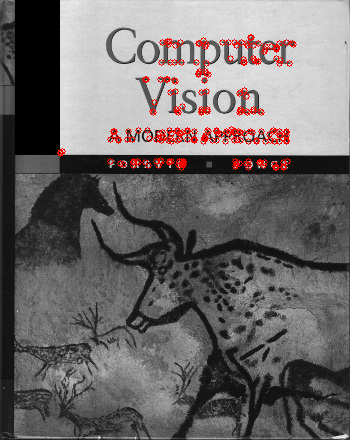

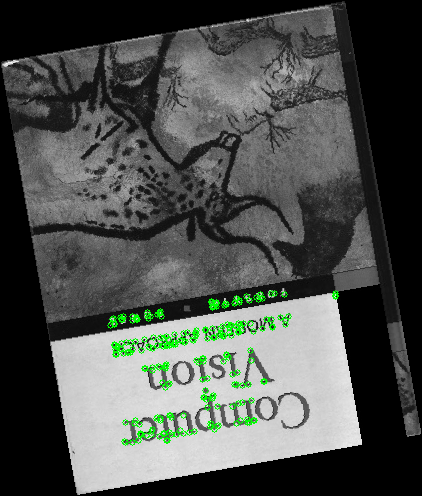

In [109]:
# Double-check the location of matched points
I1 = np.array(cv_cover)
I2 = np.array(cv_rotated)

for cy, cx in locs1[matches[:,0]]:
    cv2.circle(I1, (int(cx), int(cy)), radius=3, color=(255,0,0))

for cy, cx in locs2[matches[:,1]]:
    cv2.circle(I2, (int(cx), int(cy)), radius=3, color=(0,255,0))

display(Image.fromarray(I1))
display(Image.fromarray(I2))